<a href="https://colab.research.google.com/github/Moigi/Moigi/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth=1000

In [68]:
# Load data
path = r'/content/drive/MyDrive/Colab Notebooks/HR-Employee-Attrition.csv'
data = pd.read_csv(path, encoding='unicode_escape')

In [27]:
#data.head()

##Converting categorical variables into numeric

In [69]:
#getting all categorical columns
cat_columns = data.select_dtypes(['object']).columns

#converting all categorical columns to numeric
data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [28]:
#data.head()

In [70]:
# Separating predictor variabes (X) and response variable (y)
X = data.drop(columns=['Attrition'])
x = X.to_numpy()
Y = data['Attrition']
y = Y.to_numpy()

In [77]:
# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []
for train,test in kfold.split(x,y):
  # create model
    classifier = Sequential()
    classifier.add(Dense(12, input_dim=34, activation='relu'))
    classifier.add(Dense( 8,activation='relu'))
    classifier.add(Dense(1, activation='sigmoid'))
    # Compile model
    classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    classifier.fit(x[train], y[train], epochs=150, batch_size=10, verbose=0)
    # evaluate the model
    scores =  classifier.evaluate(x[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 83.67%
accuracy: 78.57%
accuracy: 84.01%
accuracy: 84.35%
accuracy: 70.41%
80.20% (+/- 5.34%)


10/10 [==============================] - 0s 2ms/step


Text(0.5, 23.52222222222222, 'Predicted label')

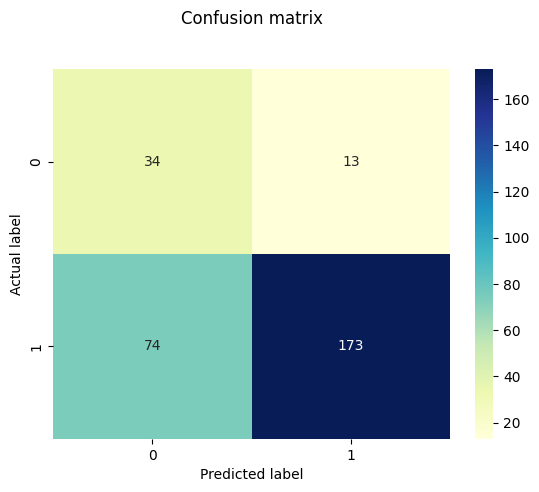

In [78]:
y_pred = classifier.predict(x[test])
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y[test], y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
